# Import Libraries 

In [33]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places

#pd.options.display.float_format = '{:.6f}'.format

#from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
#from sklearn.neighbors import NearestNeighbors
#from sklearn.decomposition import TruncatedSVD
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score


# Import dataset

In [34]:
# aniList = pd.read_csv(io.BytesIO(uploaded['AnimeList.csv']))
url = 'https://raw.githubusercontent.com/Ninelie-Nananai/AnimeListApi/main/AnimeList.csv'
aniList = pd.read_csv(url)
data = aniList.copy()
data2 = aniList.copy()

In [35]:
data2.head(1)

anime_id          title              title_english title_japanese  \
0     11013  Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   

    title_synonyms                                          image_url type  \
0  Youko x Boku SS  https://myanimelist.cdn-dena.com/images/anime/...   TV   

  source  episodes           status  airing                  aired_string  \
0  Manga        12  Finished Airing   False  Jan 13, 2012 to Mar 30, 2012   

                                        aired         duration  \
0  {'from': '2012-01-13', 'to': '2012-03-30'}  24 min. per ep.   

                      rating  score  scored_by    rank  popularity  members  \
0  PG-13 - Teens 13 or older   7.63     139250  1274.0         231   283882   

   favorites                                         background    premiered  \
0       2809  Inu x Boku SS was licensed by Sentai Filmworks...  Winter 2012   

            broadcast                                            related  \
0  Fridays at Unknown  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   

             studio                                   genre  \
0  David Production  Comedy, Supernatural, Romance, Shounen   

           opening_theme                                       ending_theme  
0  ['"Nirvana" by MUCC']  ['#1: "Nirvana" by MUCC (eps 1, 11-12)', '#2: ...

# Observe data

In [36]:
aniList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

In [37]:
aniList.isna().sum()

anime_id              0
title                 0
title_english      8754
title_japanese       35
title_synonyms     5541
image_url            96
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank               1574
popularity            0
members               0
favorites             0
background        13421
premiered         10382
broadcast         10207
related               0
producer           6190
licensor          11105
studio             5934
genre                64
opening_theme         0
ending_theme          0
dtype: int64

In [38]:
(aniList.isna().sum()/aniList.shape[0])

# มีข้อมูลที่เป็น null ไม่ถึง 1%

anime_id          0.000000
title             0.000000
title_english     0.604642
title_japanese    0.002417
title_synonyms    0.382719
image_url         0.006631
type              0.000000
source            0.000000
episodes          0.000000
status            0.000000
airing            0.000000
aired_string      0.000000
aired             0.000000
duration          0.000000
rating            0.000000
score             0.000000
scored_by         0.000000
rank              0.108717
popularity        0.000000
members           0.000000
favorites         0.000000
background        0.926993
premiered         0.717088
broadcast         0.705001
related           0.000000
producer          0.427545
licensor          0.767026
studio            0.409863
genre             0.004421
opening_theme     0.000000
ending_theme      0.000000
dtype: float64

### EDA

In [39]:
aniList.sample(5)

anime_id                         title                title_english  \
8107      12351  eX-Driver the Movie Specials                          NaN   
12559     20541       Mikakunin de Shinkoukei  Engaged to the Unidentified   
7310       4714                   The Rapeman                  The Rapeman   
12626      6448          Yuusei Shounen Papii                Prince Planet   
1075       5643          Kimi no Na wo Yobeba                          NaN   

           title_japanese                                     title_synonyms  \
8107   エクスドライバー the Movie                                                NaN   
12559             未確認で進行形                                                NaN   
7310      レイプマン アニメ・バージョン                                                NaN   
12626             遊星少年パピイ  Planet Boy Popi, Yuusei Shonen Papi, Yusei Sho...   
1075             キミの名を呼べば                                If I Call Your Name   

                                               image_url     type  \
8107   https://myanimelist.cdn-dena.com/images/anime/...  Special   
12559  https://myanimelist.cdn-dena.com/images/anime/...       TV   
7310   https://myanimelist.cdn-dena.com/images/anime/...      OVA   
12626  https://myanimelist.cdn-dena.com/images/anime/...       TV   
1075   https://myanimelist.cdn-dena.com/images/anime/...      OVA   

             source  episodes           status  airing  \
8107        Unknown         3  Finished Airing   False   
12559  4-koma manga        12  Finished Airing   False   
7310        Unknown         2  Finished Airing   False   
12626       Unknown        52  Finished Airing   False   
1075          Manga         2  Finished Airing   False   

                       aired_string  \
8107                   Apr 20, 2002   
12559   Jan 9, 2014 to Mar 27, 2014   
7310                   Oct 28, 1994   
12626   Jun 3, 1965 to May 27, 1966   
1075   Nov 28, 2008 to Feb 27, 2009   

                                            aired         duration  \
8107   {'from': '2002-04-20', 'to': '2002-04-20'}   4 min. per ep.   
12559  {'from': '2014-01-09', 'to': '2014-03-27'}  23 min. per ep.   
7310   {'from': '1994-10-28', 'to': '1994-10-28'}  30 min. per ep.   
12626  {'from': '1965-06-03', 'to': '1966-05-27'}  25 min. per ep.   
1075   {'from': '2008-11-28', 'to': '2009-02-27'}  27 min. per ep.   

                          rating  score  scored_by    rank  popularity  \
8107   PG-13 - Teens 13 or older   6.43        198  5869.0        9091   
12559  PG-13 - Teens 13 or older   7.54      92924  1530.0         403   
7310                 Rx - Hentai   6.46       1621     NaN        5357   
12626              PG - Children   6.25         58  6601.0       10215   
1075                 Rx - Hentai   6.50       1094     NaN        6012   

       members  favorites                                         background  \
8107       646          0                                                NaN   
12559   189273        761  Mikakunin de Shinkoukei originally premiered o...   
7310      3919         53                                                NaN   
12626      342          1                                                NaN   
1075      2935         16                                                NaN   

         premiered                 broadcast  \
8107           NaN                       NaN   
12559  Winter 2014  Thursdays at 02:13 (JST)   
7310           NaN                       NaN   
12626  Summer 1965                   Unknown   
1075           NaN                       NaN   

                                                 related  \
8107   {'Parent story': [{'mal_id': 378, 'type': 'ani...   
12559  {'Adaptation': [{'mal_id': 21097, 'type': 'man...   
7310   {'Adaptation': [{'mal_id': 8506, 'type': 'mang...   
12626                                                 []   
1075   {'Adaptation': [{'mal_id': 21293, 'type': 'man...   

                                                producer     

In [40]:
#วิเคราะห์ค่าที่เป็นไปได้ทั้งหมดจากคะแนน

lower_rating = aniList['scored_by'].min()
upper_rating = aniList['scored_by'].max()
print('Range of ratings vary between: {0} to {1}'.format(lower_rating, upper_rating))

Range of ratings vary between: 0 to 1009477


In [41]:

rating1 = data2[['anime_id','title', 'genre','scored_by','score']]
rating1.drop_duplicates(subset=['anime_id'],inplace=True)
rating1.reset_index(drop=True,inplace=True)

In [42]:
rating1.shape

(14478, 5)

In [43]:
# ค่าเฉลี่ยนของคะแนนโดยรวม
C = rating1['score'].mean()

# เรื่องที่มีอัตราการนับคะแนนโดยรวมมากกว่า 85%
m = rating1['scored_by'].quantile(0.85)
print('m: ', m, 'C: ', C)

m:  12584.449999999999 C:  6.142481696366902


In [44]:
def Iighted_rating(x, m=m, C=C):
    v = x['scored_by']
    R = x['score']
    return (v/(v+m) * R) + (m/(m+v) * C)

    # คำนวณ

In [45]:
# animes having total rate count greater than 85% is considered into lists_animes
lists_animes =rating1.copy().loc[rating1['scored_by'] >= m]
lists_animes.shape

(2172, 5)

In [46]:
# Define a new feature 'score' and calculate its value with `Iighted_rating()`
lists_animes['trusted_score'] = lists_animes.apply(Iighted_rating, axis=1)

In [47]:
#lists_animes.head()

In [48]:
#Sort movies based on score calculated above
lists_animes = lists_animes.sort_values('trusted_score', ascending=False)

In [49]:
# TOP 10 Most popular anime by trusted score
lists_animes[['title', 'genre', 'scored_by', 'score', 'trusted_score']].head(10)

title  \
2555                    Fullmetal Alchemist: Brotherhood   
1028                                      Kimi no Na wa.   
2999                                         Steins;Gate   
418                               Hunter x Hunter (2011)   
6572                                      Koe no Katachi   
2783                                Clannad: After Story   
7403                  Code Geass: Hangyaku no Lelouch R2   
7105                       Sen to Chihiro no Kamikakushi   
11640                            Shigatsu wa Kimi no Uso   
6511   Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...   

                                                   genre  scored_by  score  \
2555   Action, Military, Adventure, Comedy, Drama, Ma...     733592   9.25   
1028                Supernatural, Drama, Romance, School     471398   9.19   
2999                                    Thriller, Sci-Fi     563857   9.14   
418              Action, Adventure, Super Power, Shounen     403377   9.11   
6572                              Drama, School, Shounen     296261   9.04   
2783   Slice of Life, Comedy, Supernatural, Drama, Ro...     363239   9.01   
7403   Action, Military, Sci-Fi, Super Power, Drama, ...     543904   8.95   
7105                      Adventure, Supernatural, Drama     498602   8.92   
11640             Drama, Music, Romance, School, Shounen     413527   8.88   
6511              Comedy, Sports, Drama, School, Shounen     157934   8.99   

       trusted_score  
2555        9.197591  
1028        9.110759  
2999        9.074560  
418         9.020221  
6572        8.921936  
2783        8.913981  
7403        8.886511  
7105        8.851623  
11640       8.799152  
6511        8.779850

EDA 1

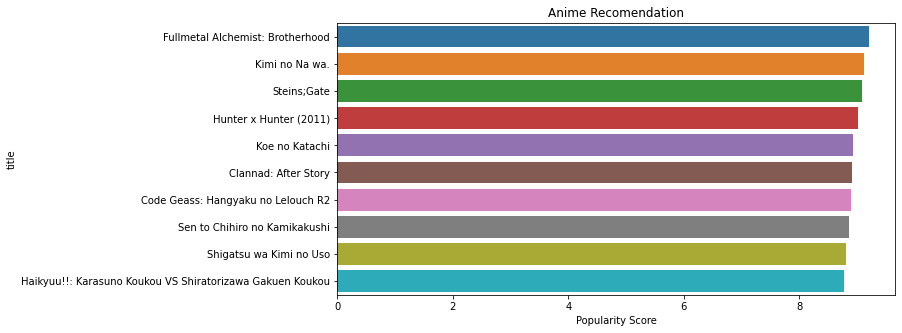

In [50]:
pop=lists_animes[['title', 'scored_by', 'score', 'trusted_score']].head(10)
plt.figure(figsize=(10,5))
sns.barplot(pop['trusted_score'],pop['title'])
plt.title('Anime Recomendation')
plt.xlabel('Popularity Score')
plt.show()

# ตัวอย่าง eda 1

EDA 2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Fullmetal Alchemist: Brotherhood'),
  Text(1, 0, 'Kimi no Na wa.'),
  Text(2, 0, 'Steins;Gate'),
  Text(3, 0, 'Hunter x Hunter (2011)'),
  Text(4, 0, 'Koe no Katachi'),
  Text(5, 0, 'Clannad: After Story'),
  Text(6, 0, 'Code Geass: Hangyaku no Lelouch R2'),
  Text(7, 0, 'Sen to Chihiro no Kamikakushi'),
  Text(8, 0, 'Shigatsu wa Kimi no Uso'),
  Text(9, 0, 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou')])

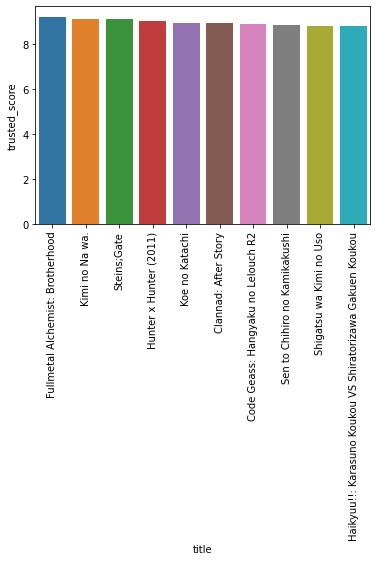

In [51]:
sns.barplot(data=lists_animes[['title', 'scored_by', 'score', 'trusted_score']].head(10), x='title',y='trusted_score');
plt.xticks(rotation=90)

# ตัวอย่าง eda 2



### **Content based Recomendation **

In [52]:
lists_animes.head()

anime_id                             title  \
2555      5114  Fullmetal Alchemist: Brotherhood   
1028     32281                    Kimi no Na wa.   
2999      9253                       Steins;Gate   
418      11061            Hunter x Hunter (2011)   
6572     28851                    Koe no Katachi   

                                                  genre  scored_by  score  \
2555  Action, Military, Adventure, Comedy, Drama, Ma...     733592   9.25   
1028               Supernatural, Drama, Romance, School     471398   9.19   
2999                                   Thriller, Sci-Fi     563857   9.14   
418             Action, Adventure, Super Power, Shounen     403377   9.11   
6572                             Drama, School, Shounen     296261   9.04   

      trusted_score  
2555       9.197591  
1028       9.110759  
2999       9.074560  
418        9.020221  
6572       8.921936

In [53]:
def combine_string(row):
  res = [str(r) for r in row]
  return ' | '.join(res)
  # ฟังก์ชัน combine string

In [54]:
data3=aniList.copy()

cb = ['genre','type','episodes'] # 

data3['describe'] = data3[cb].apply(combine_string,axis = 1)
data3['describe'].fillna(' ')
data3.head()

# สร้าง dataset ใหม่ ชื่อ data3 และเพิ่ม column ใหม่คือ describe ซึ่งเอา genre type episodes มาผสมกัน

# considering the anime content
#data3['describe']=data3['genre'],data3['type'],data3['episodes']
#data3['describe'].fillna(' ')
#data3.head()

anime_id                title              title_english title_japanese  \
0     11013        Inu x Boku SS  Inu X Boku Secret Service         妖狐×僕SS   
1      2104     Seto no Hanayome      My Bride is a Mermaid          瀬戸の花嫁   
2      5262   Shugo Chara!! Doki         Shugo Chara!! Doki    しゅごキャラ！！どきっ   
3       721        Princess Tutu              Princess Tutu      プリンセスチュチュ   
4     12365  Bakuman. 3rd Season                   Bakuman.          バクマン。   

                                  title_synonyms  \
0                                Youko x Boku SS   
1                           The Inland Sea Bride   
2  Shugo Chara Ninenme, Shugo Chara! Second Year   
3                                            NaN   
4                               Bakuman Season 3   

                                           image_url type    source  episodes  \
0  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        12   
1  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        26   
2  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        51   
3  https://myanimelist.cdn-dena.com/images/anime/...   TV  Original        38   
4  https://myanimelist.cdn-dena.com/images/anime/...   TV     Manga        25   

            status  airing                  aired_string  \
0  Finished Airing   False  Jan 13, 2012 to Mar 30, 2012   
1  Finished Airing   False    Apr 2, 2007 to Oct 1, 2007   
2  Finished Airing   False   Oct 4, 2008 to Sep 25, 2009   
3  Finished Airing   False  Aug 16, 2002 to May 23, 2003   
4  Finished Airing   False   Oct 6, 2012 to Mar 30, 2013   

                                        aired         duration  \
0  {'from': '2012-01-13', 'to': '2012-03-30'}  24 min. per ep.   
1  {'from': '2007-04-02', 'to': '2007-10-01'}  24 min. per ep.   
2  {'from': '2008-10-04', 'to': '2009-09-25'}  24 min. per ep.   
3  {'from': '2002-08-16', 'to': '2003-05-23'}  16 min. per ep.   
4  {'from': '2012-10-06', 'to': '2013-03-30'}  24 min. per ep.   

                      rating  score  scored_by    rank  popularity  members  \
0  PG-13 - Teens 13 or older   7.63     139250  1274.0         231   283882   
1  PG-13 - Teens 13 or older   7.89      91206   727.0         366   204003   
2              PG - Children   7.55      37129  1508.0        1173    70127   
3  PG-13 - Teens 13 or older   8.21      36501   307.0         916    93312   
4  PG-13 - Teens 13 or older   8.67     107767    50.0         426   182765   

   favorites                                         background    premiered  \
0       2809  Inu x Boku SS was licensed by Sentai Filmworks...  Winter 2012   
1       2579                                                NaN  Spring 2007   
2        802                                                NaN    Fall 2008   
3       3344  Princess Tutu aired in two parts. The first pa...  Summer 2002   
4       2082                                                NaN    Fall 2012   

            broadcast                                            related  \
0  Fridays at Unknown  {'Adaptation': [{'mal_id': 17207, 'type': 'man...   
1             Unknown  {'Adaptation': [{'mal_id': 759, 'type': 'manga...   
2             Unknown  {'Adaptation': [{'mal_id': 101, 'type': 'manga...   
3  Fridays at Unknown  {'Adaptation': [{'mal_id': 1581, 'type': 'mang...   
4             Unknown  {'Adaptation': [{'mal_id': 9711, 'type': 'mang...   

                                            producer          licensor  \
0  Aniplex, Square Enix, Mainichi Broadcasting Sy...  Sentai Filmworks   
1                  TV Tokyo, AIC, Square Enix, Sotsu        Funimation   
2                                    TV Tokyo, Sotsu               NaN   
3                 Memory-Tech, GANSIS, Marvelous AQL         ADV Films   
4                                      NHK, Shueisha               NaN   

             studio                                     genre  \
0  David Production    Comedy, Supernatural, Romance,

In [55]:
data3.drop_duplicates(subset=['title'],inplace=True)
# ดรอปตัวซ้ำ

In [56]:
data3.shape
# row, col check

(14477, 32)

In [57]:
data3.reset_index(drop=True,inplace=True)

In [58]:
tf = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
tf_matrix = tf.fit_transform(data3['describe'])
tf_matrix.shape

(14477, 1654)

In [59]:
# ตัวแปรพวก TfidfVectorizer  ,linear_kernel ,cosine_similarity คืออัลกอริทึมการหาค่าเฉลี่ยความถี่ของตัวอักษรภาษา eng ต่างๆในข้อมูล 


#simil = linear_kernel(tf_matrix, tf_matrix) # คล้ายๆกัน ไม่รู้ต่างกันยังไง
simil = cosine_similarity(tf_matrix,tf_matrix) # คล้ายๆกัน ไม่รู้ต่างกันยังไง ใช้ได้สองแบบ

simil.shape

(14477, 14477)

In [60]:
id=data3['anime_id'].values



simil = pd.DataFrame(simil, index=id, columns=id)

simil.columns = data3['title']

simil['anime_name'] = data3['title'].values

#  คำนวณค่าเฉลี่ยต่างๆจาก algo TfidfVectorizer

In [61]:
simil.head()

title  Inu x Boku SS  Seto no Hanayome  Shugo Chara!! Doki  Princess Tutu  \
11013       1.000000          0.212981            0.040323       0.077579   
2104        0.212981          1.000000            0.081322       0.070021   
5262        0.040323          0.081322            1.000000       0.081862   
721         0.077579          0.070021            0.081862       1.000000   
12365       0.421947          0.213368            0.040396       0.199782   

title  Bakuman. 3rd Season  Yume-iro Pâtissière  Ultra Maniac  \
11013             0.421947             0.023686      0.088704   
2104              0.213368             0.069479      0.370707   
5262              0.040396             0.369525      0.430791   
721               0.199782             0.018728      0.121859   
12365             1.000000             0.023729      0.088865   

title  Shakugan no Shana II (Second)  Nodame Cantabile: Paris-hen  \
11013                       0.109552                     0.069743   
2104                        0.172679                     0.062948   
5262                        0.056555                     0.028662   
721                         0.096759                     0.055144   
12365                       0.093580                     0.069870   

title  Ouran Koukou Host Club  Junjou Romantica 2  Kaichou wa Maid-sama!  \
11013                0.085260            0.409372               0.101070   
2104                 0.356315            0.114489               0.422389   
5262                 0.359138            0.035009               0.425736   
721                  0.067413            0.173139               0.079914   
12365                0.085415            0.525628               0.101254   

title  Sekaiichi Hatsukoi 2  Tonari no Kaibutsu-kun    Bleach   Chobits  \
11013              0.409372                0.089538  0.159952  0.075905   
2104               0.114489                0.217499  0.107987  0.201348   
5262               0.035009                0.377161  0.026218  0.031194   
721                0.173139                0.070796  0.023730  0.154275   
12365              0.525628                0.089701  0.119861  0.287626   

title  Kimi ni Todoke  Naruto: Shippuuden   Ranma ½  Toradora!  \
11013        0.064090            0.111136  0.030188   0.094332   
2104         0.182056            0.100308  0.027247   0.229143   
5262         0.327647            0.024353  0.026372   0.086624   
721          0.077868            0.022042  0.108622   0.074586   
12365        0.448503            0.111338  0.030243   0.385563   

title  Bakuman. 2nd Season  Gakuen Alice  Skip Beat!  Chihayafuru 2  \
11013             0.421947      0.037648    0.095737       0.015133   
2104              0.213368      0.215981    0.086410       0.044392   
5262              0.040396      0.242863    0.222940       0.042966   
721               0.199782      0.029767    0.194582       0.031560   
12365             1.000000      0.037716    0.658171       0.220895   

title  Shounen Onmyouji  Chihayafuru  Itazura na Kiss  Beelzebub  \
11013          0.057113     0.015133         0.103686   0.172359   
2104           0.127262     0.044392         0.093584   0.235898   
5262           0.178886     0.042966         0.241449   0.063127   
721            0.069562     0.031560         0.081982   0.025570   
12365          0.016595     0.220895         0.423794   0.129159   

title  Hanasakeru Seishounen  SKET Dance  B-gata H-kei  Crayon Shin-chan  \
11013               0.077223    0.165335      0.209750          0.042547   
2104                0.069699    0.302522      0.123208          0.085809   
5262                0.210116    0.080956      0.079301          0.083052   
721                 0.093824    0.032792      0.068280          0.033641   
12365               0.237905    0.165636      0.086514          0.042625   

title  Fruits Basket  Saiunkoku Monogatari  One Piece  Glass no Kamen (2005)  \
11013       0.081034              0.073753   0.151378

In [30]:
if([simil.anime_name.value_counts()>1]==True):
    print('There are duplicates rows')
else:
    print('There are no duplicate rows')

# เช็คข้อมูลอีกรอบ

There are no duplicate rows


In [31]:
# โชว์รายการที่ใกล้เคียงกับชื่ออนิเมะที่กรอกโดยอิงจาก genre

def content_rec(name):
    idx = simil[simil['anime_name']==name]

    idx = idx.drop('anime_name', axis=1).T

    idx.columns = ['similar_anime']
    
    idx['similar_by_genre'] = data3['genre'].values
    
    idx = idx.sort_values(by='similar_anime', ascending=False)

    return pd.DataFrame(idx.head(10))

In [62]:
content_rec('One Piece')

similar_anime  \
title                                                               
One Piece                                                1.000000   
One Piece: Long Ring Long Land-hen                       0.900420   
One Piece: Episode of Sabo - 3 Kyoudai no Kizun...       0.900420   
One Piece: Episode of East Blue - Luffy to 4-ni...       0.900420   
One Piece: Episode of Sorajima                           0.900420   
Shingeki no Kyojin OVA                                   0.689698   
Shingeki no Kyojin Movie 3: Kakusei no Houkou            0.687874   
Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa             0.687874   
One Piece Movie 3: Chinjuu-jima no Chopper Oukoku        0.644795   
One Piece Movie 9: Episode of Chopper Plus - Fu...       0.644795   

                                                                                     similar_by_genre  
title                                                                                                  
One Piece                                           Action, Adventure, Comedy, Super Power, Drama,...  
One Piece: Long Ring Long Land-hen                  Action, Adventure, Comedy, Super Power, Drama,...  
One Piece: Episode of Sabo - 3 Kyoudai no Kizun...  Action, Adventure, Comedy, Super Power, Drama,...  
One Piece: Episode of East Blue - Luffy to 4-ni...  Action, Adventure, Comedy, Super Power, Drama,...  
One Piece: Episode of Sorajima                      Action, Adventure, Comedy, Super Power, Drama,...  
Shingeki no Kyojin OVA                                   Action, Super Power, Drama, Fantasy, Shounen  
Shingeki no Kyojin Movie 3: Kakusei no Houkou            Action, Super Power, Drama, Fantasy, Shounen  
Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa             Action, Super Power, Drama, Fantasy, Shounen  
One Piece Movie 3: Chinjuu-jima no Chopper Oukoku   Action, Adventure, Comedy, Super Power, Fantas...  
One Piece Movie 9: Episode of Chopper Plus - Fu...  Action, Adventure, Comedy, Super Power, Fantas...